In [72]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
season_year = ["2016", "2017", "2018", "2019", "2020", "2021", "2022", "2023"]
trsfrmkt_msl_link = "https://www.transfermarkt.com/malaysia-super-league/startseite/wettbewerb/MYS1/plus/?saison_id="

page_msl = ["https://www.transfermarkt.com/malaysia-super-league/startseite/wettbewerb/MYS1/plus/?saison_id=2016",
            "https://www.transfermarkt.com/malaysia-super-league/startseite/wettbewerb/MYS1/plus/?saison_id=2017",
            "https://www.transfermarkt.com/malaysia-super-league/startseite/wettbewerb/MYS1/plus/?saison_id=2018",
            "https://www.transfermarkt.com/malaysia-super-league/startseite/wettbewerb/MYS1/plus/?saison_id=2019",
            "https://www.transfermarkt.com/malaysia-super-league/startseite/wettbewerb/MYS1/plus/?saison_id=2020",
            "https://www.transfermarkt.com/malaysia-super-league/startseite/wettbewerb/MYS1/plus/?saison_id=2021",
            "https://www.transfermarkt.com/malaysia-super-league/startseite/wettbewerb/MYS1/plus/?saison_id=2022",
            "https://www.transfermarkt.com/malaysia-super-league/startseite/wettbewerb/MYS1/plus/?saison_id=2023",
]


In [74]:
headers = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.106 Safari/537.36'}

for yr in range(0, len(season_year)):
    page_year = trsfrmkt_msl_link + season_year[yr]
    pageTree = requests.get(page_year, headers=headers)
    pageSoup = BeautifulSoup(pageTree.content, 'html.parser')
    
    TeamsList = []
    TeamLinksList = []
    Teams = pageSoup.find_all("td", {"class": "hauptlink no-border-links"})
    TeamLinks = pageSoup.find_all("td", {"class": "hauptlink no-border-links"})
    
    for i in range(0, len(Teams)):
        str_Teams = str(Teams[i]).split('title="',1)[1].split('">',1)[0]
        TeamsList.append(str_Teams)
    for i in range(0, len(TeamLinks)):
        str_TeamLinks = str(TeamLinks[i]).split('a href="',1)[1].split('"',1)[0]
        TeamLinksList.append("https://www.transfermarkt.com" + str_TeamLinks)

In [75]:
headers = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.106 Safari/537.36'}

page = page_msl[6]
pageTree = requests.get(page, headers=headers)
pageSoup = BeautifulSoup(pageTree.content, 'html.parser')

In [76]:
TeamsList = []
TeamLinksList = []

In [77]:
Teams = pageSoup.find_all("td", {"class": "hauptlink no-border-links"})
TeamLinks = pageSoup.find_all("td", {"class": "hauptlink no-border-links"})

In [78]:
for i in range(0, len(Teams)):
    str_Teams = str(Teams[i]).split('title="',1)[1].split('">',1)[0]
    TeamsList.append(str_Teams)

In [79]:
for i in range(0, len(TeamLinks)):
    str_TeamLinks = str(TeamLinks[i]).split('a href="',1)[1].split('"',1)[0]
    TeamLinksList.append("https://www.transfermarkt.com" + str_TeamLinks)

In [80]:
df = pd.DataFrame({
                    "Team":TeamsList,
                    "Link":TeamLinksList
})
df

,Team,Link
0,Johor Darul Ta'zim,https://www.transfermarkt.com/johor-darul-tazi...
1,Selangor FC,https://www.transfermarkt.com/selangor-fc/star...
2,Kedah Darul Aman FC,https://www.transfermarkt.com/kedah-darul-aman...
3,Sabah FC,https://www.transfermarkt.com/sabah-fc/startse...
4,Kuala Lumpur City FC,https://www.transfermarkt.com/kuala-lumpur-cit...
5,Terengganu FC,https://www.transfermarkt.com/terengganu-fc/st...
6,Sri Pahang FC,https://www.transfermarkt.com/sri-pahang-fc/st...
7,Negeri Sembilan FC,https://www.transfermarkt.com/negeri-sembilan-...
8,Kuching City,https://www.transfermarkt.com/kuching-city/sta...
9,Penang FC,https://www.transfermarkt.com/penang-fc/starts...


In [84]:
SeasonList = []
PlayerTeamsList = []
PlayersList = []
NumberList = []
AgeList = []
PositionList = []
NationList = []
ValueList = []

In [85]:
for link in range(0, len(TeamLinksList)):
    page = TeamLinksList[link]
    pageTree = requests.get(page, headers=headers)
    pageSoup = BeautifulSoup(pageTree.content, 'html.parser')
    
    TeamNames = pageSoup.find_all("h1", {"class": "data-header__headline-wrapper data-header__headline-wrapper--oswald"})
    Players = pageSoup.find_all("img", {"class": "bilderrahmen-fixed lazy lazy"})
    Numbers = pageSoup.find_all("div", {"class": "rn_nummer"})
    Age = pageSoup.find_all("td", {"class": "zentriert"})
    Positions = pageSoup.find_all("table", {"class": "inline-table"})
    Nationality = pageSoup.find_all("td", {"class": "zentriert"})
    Values = pageSoup.find_all("td", {"class": "rechts hauptlink"})
    
    for i in range(0, len(Players)):
        SeasonList.append("2017")
    
    for i in range(0, len(Players)):
        str_Team = str(TeamNames).split('">\n            ',1)[1].split('        </h1>',1)[0]
        PlayerTeamsList.append(str_Team)
    
    for i in range(0, len(Players)):
        str_Players = str(Players[i]).split('" class',1)[0].split('<img alt="',1)[1]
        PlayersList.append(str_Players)
    
    for i in range(0, len(Numbers)):
        str_Numbers = str(Numbers[i]).split('class="rn_nummer">',1)[1].split('</div>',1)[0]
        NumberList.append(str_Numbers)
    
    for i in range(1, (len(Players)*4), 4): #if season 2023, skip 4 rows
        str_Age = str(Age[i]).split("(",1)[1].split(")",1)[0]
        AgeList.append(str_Age)
        
    for i in range(0, len(Positions)):
        str_Position = str(Positions[i]).split('<td>', 1)[1].split('</td>', 1)[0].split('\n ', 1)[1].split('           ', 1)[1].split('        ',1)[0]
        PositionList.append(str_Position)
    
    grouped_positionList = []
    
    for j in range(0, len(PositionList)):
        if 'Striker' in PositionList[j]:
            grouped_positionList.append('Forwards')
        elif 'Forward' in PositionList[j]:
            grouped_positionList.append('Forwards')
        elif 'Midfield' in PositionList[j]:
            grouped_positionList.append('Midfielders')
        elif 'Midfielder' in PositionList[j]:
            grouped_positionList.append('Midfielders')
        elif 'Winger' in PositionList[j]:
            grouped_positionList.append('Midfielders')
        elif 'Back' in PositionList[j]:
            grouped_positionList.append('Defenders')
        elif 'Defender' in PositionList[j]:
            grouped_positionList.append('Defenders')
        else:
            grouped_positionList.append(PositionList[j])
    
    for i in range(2, (len(Players)*4),4): #if season 2023, skip 3 rows, else, skip 4 rows
        str_Nationality = str(Nationality[i]).split('" class',1)[0].split('<img alt="',1)[1]
        NationList.append(str_Nationality)
    
    for i in range(0, len(Values)):
        ValueList.append(Values[i].text)
        
    cleaned_values=[]

    for a in range(0, len(ValueList)):
        if 'k' in ValueList[a]:
            str_a = str(ValueList[a]).split('€')[1].split('k')[0]
            flt_a = float(str_a)*1000
            cleaned_values.append(flt_a)
        elif 'm' in ValueList[a]:
            str_a = str(ValueList[a]).split('€')[1].split('m')[0]
            flt_a = float(str_a)*1000000
            cleaned_values.append(flt_a)
        else:
            cleaned_values.append(float(a))


        
    
    
    

In [86]:
grouped_positionList = []
    
for j in range(0, len(PositionList)):
    if 'Striker' in PositionList[j]:
        grouped_positionList.append('Forwards')
    elif 'Forward' in PositionList[j]:
        grouped_positionList.append('Forwards')
    elif 'Midfield' in PositionList[j]:
        grouped_positionList.append('Midfielders')
    elif 'Midfielder' in PositionList[j]:
        grouped_positionList.append('Midfielders')
    elif 'Winger' in PositionList[j]:
        grouped_positionList.append('Midfielders')
    elif 'Back' in PositionList[j]:
        grouped_positionList.append('Defenders')
    elif 'Defender' in PositionList[j]:
        grouped_positionList.append('Defenders')
    else:
        grouped_positionList.append(PositionList[j])
        

#print(grouped_positionList)
#print(len(grouped_positionList))
            

In [87]:
len(PlayerTeamsList)

535

In [88]:
len(PlayersList)
 

535

In [89]:
len(NumberList)

535

In [90]:

len(AgeList)

535

In [91]:

len(PositionList)

535

In [92]:

len(grouped_positionList)

535

In [93]:

len(NationList)

535

In [94]:

len(cleaned_values) 

535

In [95]:
final_df = pd.DataFrame({
                         "Season":SeasonList,
                         "Team":PlayerTeamsList,
                         "Player":PlayersList,
                         "Number":NumberList,
                         "Age":AgeList,
                         "Position":PositionList,
                         "Group Position":grouped_positionList,
                         "Nationality":NationList,
                         "ValueEUR":cleaned_values                        
                        })

In [96]:
final_df

,Season,Team,Player,Number,Age,Position,Group Position,Nationality,ValueEUR
0,2017,Johor Darul Ta'zim,Farizal Marlias,1,35,Goalkeeper,Goalkeeper,Malaysia,200000.0
1,2017,Johor Darul Ta'zim,Haziq Nadzli,26,23,Goalkeeper,Goalkeeper,Malaysia,75000.0
2,2017,Johor Darul Ta'zim,Syihan Hazmi,33,25,Goalkeeper,Goalkeeper,Malaysia,25000.0
3,2017,Johor Darul Ta'zim,Jordi Amat,5,29,Centre-Back,Defenders,Indonesia,1400000.0
4,2017,Johor Darul Ta'zim,Shane Lowry,14,32,Centre-Back,Defenders,Australia,300000.0
...,...,...,...,...,...,...,...,...,...
530,2017,PDRM FC,Uche Agba,21,35,Centre-Forward,Forwards,Nigeria,200000.0
531,2017,PDRM FC,Arif Anwar,20,26,Centre-Forward,Forwards,Malaysia,50000.0
532,2017,PDRM FC,Hadi Fayyadh,18,21,Centre-Forward,Forwards,Malaysia,25000.0
533,2017,PDRM FC,Bruno Suzuki,9,31,Centre-Forward,Forwards,Japan,533.0


In [184]:
# Export the DataFrame to an Excel file
final_df.to_excel(r"C:\Users\izzat\OneDrive\Desktop\MalaysiaSuperLeague_TeamsSquadAnalysis\dataXL\MSL_TeamsSquadData_season2017.xlsx", index=False)

In [185]:
# Export the DataFrame to an csv file
final_df.to_csv(r"C:\Users\izzat\OneDrive\Desktop\MalaysiaSuperLeague_TeamsSquadAnalysis\datacsv\MSL_TeamsSquadData_season2017.csv", index=False)

In [33]:
# Load the dataset
msldata = pd.read_csv(r"C:\Users\izzat\OneDrive\Desktop\MalaysiaSuperLeague_TeamsSquadAnalysis\MSL_TeamsSquadData.csv")

# Display the first few rows of the dataset
#print(msldata.head())


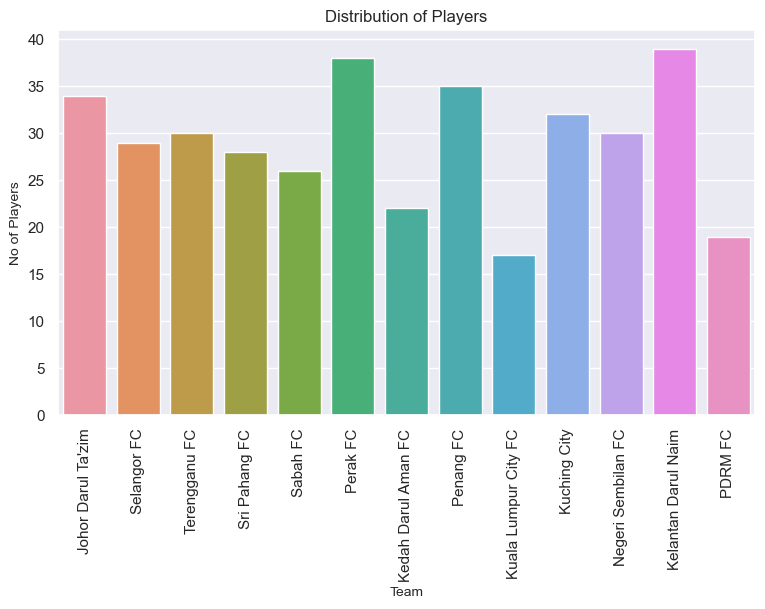

In [35]:
# Plotting the distribution of players
sns.set(style="whitegrid")
sns.set(font_scale=1.0)
plt.figure(figsize=(9, 5))
sns.countplot(data=msldata, x='Team')
plt.title('Distribution of Players')
plt.xlabel('Team', fontsize=10)
plt.ylabel('No of Players', fontsize=10)
# Rotate the tick labels in the second subplot
plt.xticks(rotation=90)
plt.show()

In [36]:
# Display Top 10 Most Expensive Players in MSL 24/25 Season
Top10Value = msldata.nlargest(n=10, columns=['Value EUR'])

# Display Top 10 Least Expensive Players in MSL 24/25 Season
Bottom10Value = msldata.nsmallest(n=10, columns=['Value EUR'])

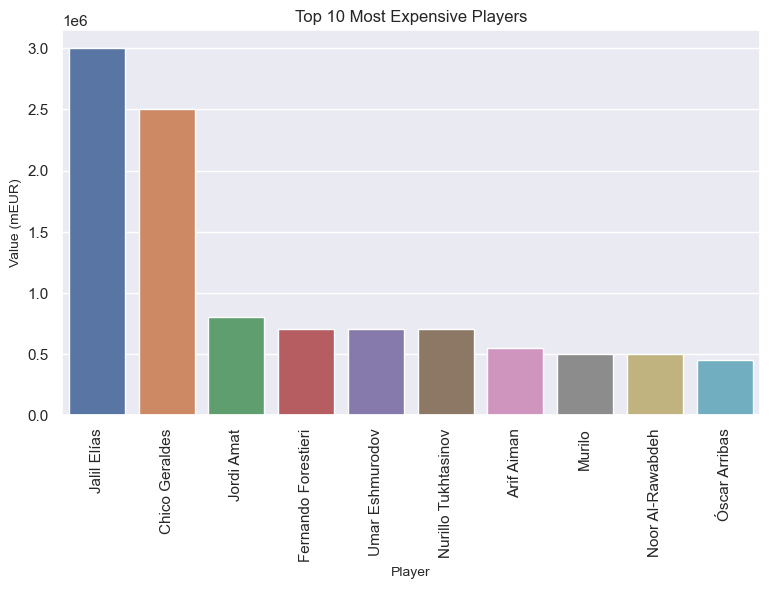

In [37]:
# Plotting Value 
sns.set(style="whitegrid")
sns.set(font_scale=1.0)
plt.figure(figsize=(9, 5))
sns.barplot(Top10Value, x="Player", y="Value EUR")
plt.title('Top 10 Most Expensive Players')
plt.xlabel('Player', fontsize=10)
plt.ylabel('Value (mEUR)', fontsize=10)
# Rotate the tick labels in the second subplot
plt.xticks(rotation=90)
plt.show()

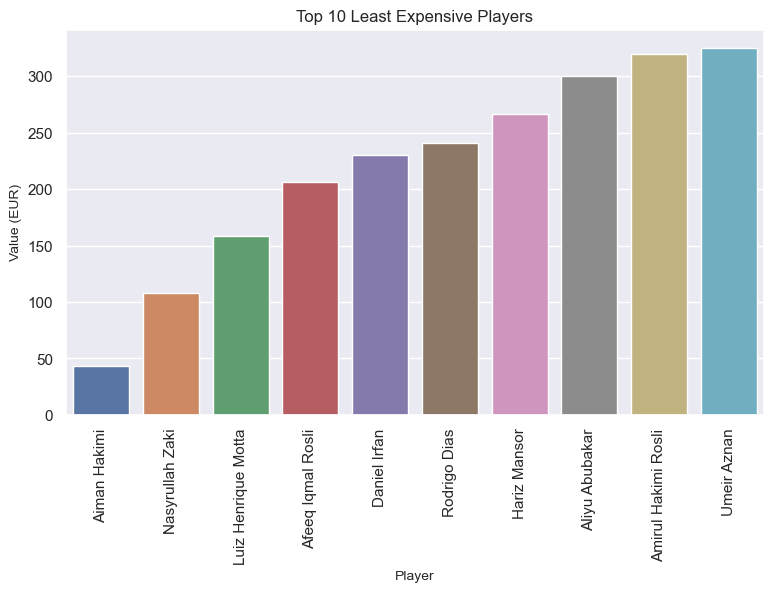

In [38]:
# Plotting Top 10 Least Expensive Players in MSL 24/25 Season
sns.set(style="whitegrid")
sns.set(font_scale=1.0)
plt.figure(figsize=(9, 5))
sns.barplot(Bottom10Value, x="Player", y="Value EUR")
plt.title('Top 10 Least Expensive Players')
plt.xlabel('Player', fontsize=10)
plt.ylabel('Value (EUR)', fontsize=10)
# Rotate the tick labels in the second subplot
plt.xticks(rotation=90)
plt.show()

In [39]:
pv_count = msldata.pivot_table('Value EUR', index='Team', columns='Group Position', aggfunc='count')
pv_sum = msldata.pivot_table('Value EUR', index='Team', columns='Group Position', aggfunc='sum')
pv_count
pv_sum

Group Position,Defenders,Forwards,Goalkeeper,Midfielders
Team,,,,
Johor Darul Ta'zim,3175000.0,1775000.0,500000.0,9050000.0
Kedah Darul Aman FC,1300000.0,225206.0,400000.0,1160000.0
Kelantan Darul Naim,801321.0,150000.0,200000.0,1075693.0
Kuala Lumpur City FC,1075000.0,125000.0,150000.0,1275000.0
Kuching City,1075267.0,500000.0,175000.0,860000.0
Negeri Sembilan FC,860300.0,320.0,275000.0,1235000.0
PDRM FC,475000.0,250000.0,50000.0,860000.0
Penang FC,1035000.0,125241.0,275000.0,1210230.0
Perak FC,910158.0,175000.0,350000.0,1850000.0


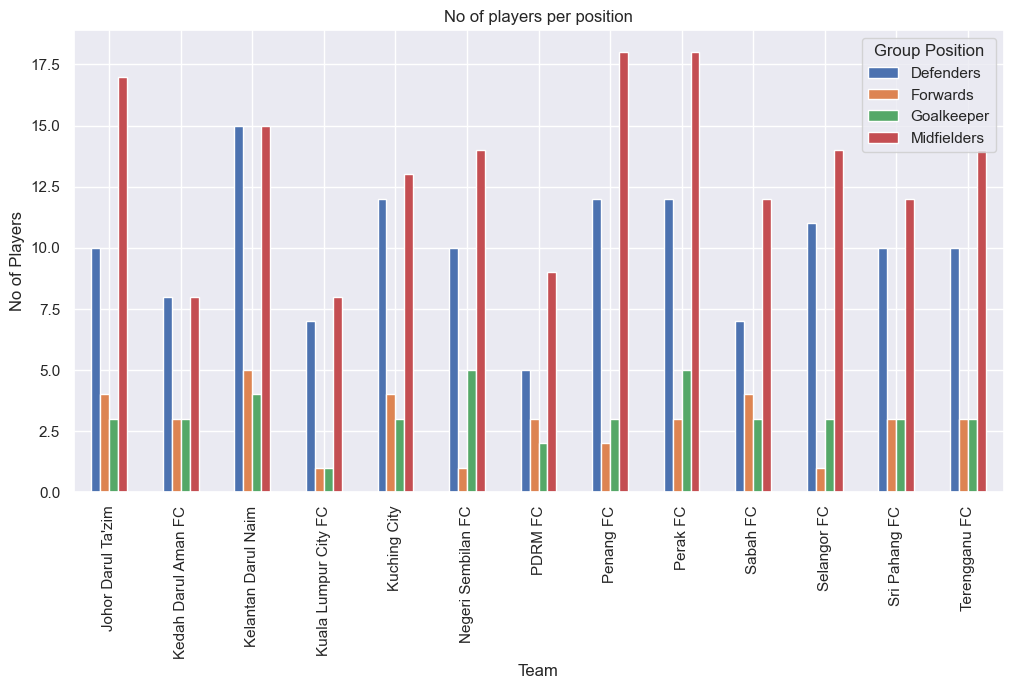

In [40]:
# Plotting bar chart from  pv_count
pv_count.plot(kind='bar', figsize=(12, 6))

# graph title
plt.title('No of players per position')

# naming the x and y axis
plt.xlabel('Team')
plt.ylabel('No of Players')

# Rotate the tick labels in the second subplot
plt.xticks(rotation=90)

plt.show()

Text(0, 1.05, 'in millions')

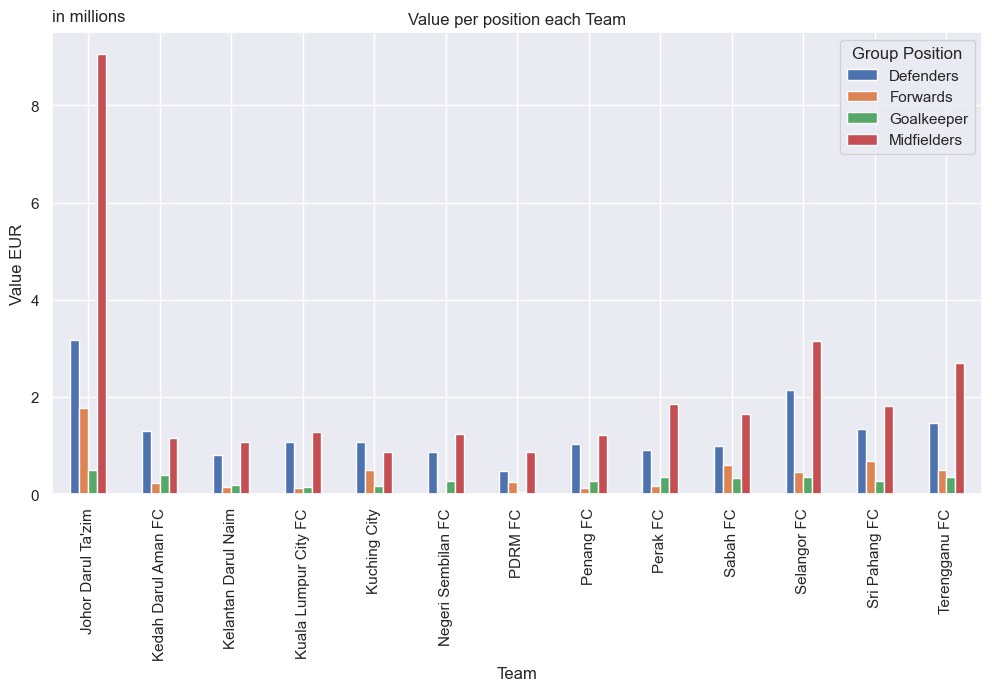

In [41]:
from matplotlib.ticker import NullFormatter

def formatter(x, pos):
    return str(round(x / 1e6))

ax = pv_sum.plot(kind='bar', figsize=(12, 6))

# graph title
plt.title('Value per position each Team')

# naming the x and y axis
plt.xlabel('Team')
plt.ylabel('Value EUR')

#fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)
#ax.yaxis.set_minor_formatter(NullFormatter())
#ax.plot([0, 1e6])
ax.text(0, 1.05, "in millions", transform = ax.transAxes, ha = "left", va = "top")